In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = dd.read_csv('flows.txt', names=['time', 'duration','src', 'src_port', 'dest', 
                                    'dest_port', 'protocol', 'packet_count', 'byte_count'])
print(df.describe().compute())

         byte_count      duration  packet_count      protocol          time
count  1.299774e+08  1.299774e+08  1.299774e+08  1.299774e+08  1.299774e+08
mean   2.197665e+05  9.915655e+00  2.595261e+02  6.727521e+00  6.936395e+05
std             NaN  1.918542e+01  7.864851e+03  3.085636e+00           NaN
min    4.600000e+01  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
25%    1.930000e+02  0.000000e+00  2.000000e+00  6.000000e+00  4.602900e+05
50%    1.271000e+03  0.000000e+00  6.000000e+00  6.000000e+00  8.631960e+05
75%    8.106400e+04  1.500000e+01  1.320000e+02  6.000000e+00  2.488959e+06
max    2.681847e+09  7.600000e+01  2.471188e+06  4.100000e+01  3.126928e+06


/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/dask/compatibility.py:28: RuntimeWarning: invalid value encountered in sqrt
  return func(*args)


In [83]:
reader = pd.read_csv('flows.txt', names=['time', 'duration','src', 'src_port', 'dest', 
                                         'dest_port', 'protocol', 'packet_count', 'byte_count'], chunksize=17502170)
#print(len(reader))
#for chunk in reader:
#    chunk.describe()
#    break
for i in range(1):
    df = reader.get_chunk()
    print(df.describe())


               time      duration      protocol  packet_count    byte_count
count  1.750217e+07  1.750217e+07  1.750217e+07  1.750217e+07  1.750217e+07
mean   8.746004e+04  8.747186e+00  6.768845e+00  2.082454e+02  1.592709e+05
std    4.273230e+04  1.802137e+01  3.195421e+00  5.301856e+03  6.629617e+06
min    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  4.600000e+01
25%    4.842800e+04  0.000000e+00  6.000000e+00  1.000000e+00  5.200000e+01
50%    9.134600e+04  0.000000e+00  6.000000e+00  3.000000e+00  1.950000e+02
75%    1.260840e+05  9.000000e+00  6.000000e+00  7.000000e+00  1.678000e+03
max    1.598660e+05  7.300000e+01  4.100000e+01  1.534824e+06  2.295971e+09


In [84]:
window = 3600
slide = 1800

graph_dict = dict()
for i in range(44):
    # G = nx.from_pandas_dataframe(df[df.time < 3600*(i+1)], 'src', 'dest', create_using=nx.DiGraph())
    times = df[df.time < 3600*(i+1)]
    graph_dict[i] = nx.from_pandas_dataframe(df[(df.time < window*(i+1)) & (df.time >= window*i)],
                                             'src', 'dest', create_using=nx.DiGraph())

In [85]:
for k,v in graph_dict.items():
    print(v.number_of_nodes(), v.number_of_edges())

3624 12586
3646 12705
3657 12756
3640 12711
3670 12786
3819 13986
4729 23038
6094 35089
6581 39914
6636 40284
6708 39485
6632 37330
6705 37581
6773 38344
6706 37506
6730 38055
6515 34495
5957 30105
5746 28620
5595 27999
5607 27623
5604 27320
5573 27179
5539 27733
5526 27112
5505 27106
5466 26816
5470 27069
5489 26983
5545 27037
6048 32199
6634 38644
6877 40832
6972 42660
6959 41614
6991 40024
7010 40234
7022 40573
7835 41603
7015 40641
6725 36676
6181 32369
5888 29957
5773 29044


3


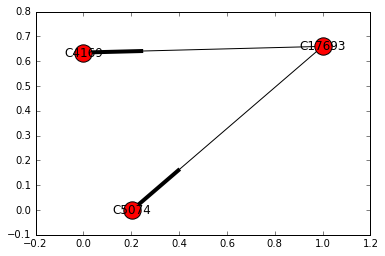

In [106]:
G1 = graph_dict[36]
subs = G1['C17693']
subs['C17693'] = {}
print(len(subs))
nx.draw_networkx(G1.subgraph(subs.keys()), with_labels=True)

17


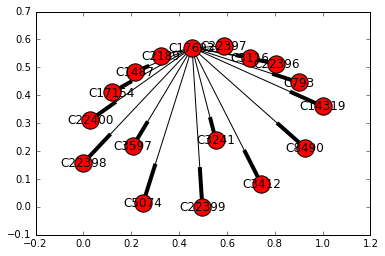

In [103]:
G2 = graph_dict[38]
subs = G2['C17693']
subs['C17693'] = {}
print(len(subs))
nx.draw_networkx(G2.subgraph(subs.keys()), with_labels=True)


17


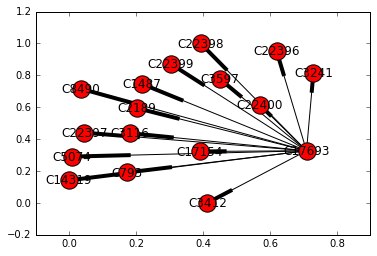

In [98]:
G3 = graph_dict[39]
subs = G3['C17693']
subs['C17693'] = {}
print(len(subs))
nx.draw_networkx(G3.subgraph(subs.keys()), with_labels=True)

3


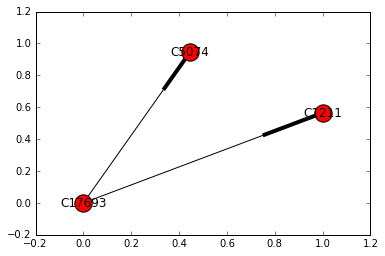

In [104]:
G4 = graph_dict[40]
subs = G4['C17693']
subs['C17693'] = {}
print(len(subs))
nx.draw_networkx(G4.subgraph(subs.keys()), with_labels=True)

In [120]:
node = 'C17693'
ts = []
ix = []
for i in range(44):
    g = graph_dict[i]
    if g.has_node(node):
        ts.append(g.out_degree()[node])
        ix.append(i)
    
print(ts, ix)

[2, 2, 3, 17, 17, 3, 3, 2, 2] [34, 35, 36, 38, 39, 40, 41, 42, 43]


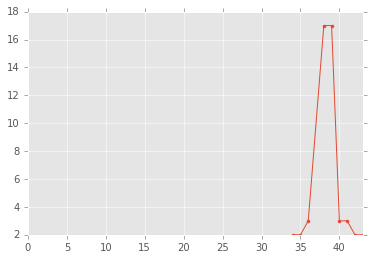

In [121]:
plt.style.use('ggplot')
plt.xlim([0, 43])
plt.plot(ix, ts, '.-')

[8, 7, 7, 7, 4, 7, 4, 7, 7, 6, 6, 3, 6, 5, 5, 5, 4, 5, 4, 5, 3, 8, 4, 5, 5, 3, 7, 3, 11, 4, 5, 5, 5, 6, 4, 5, 7, 5, 5, 4, 5, 4, 5, 3] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


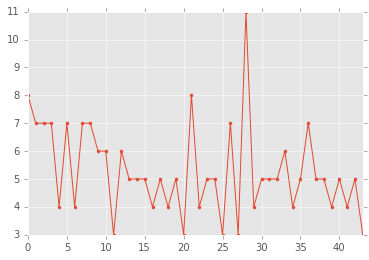

In [118]:
node = 'C4645'
ts = []
ix = []
for i in range(44):
    g = graph_dict[i]
    if g.has_node(node):
        
        ts.append(g.out_degree()[node])
        ix.append(i)
    
print(ts, ix)

plt.style.use('ggplot')
plt.xlim([0, 43])
plt.plot(ix, ts, '.-')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


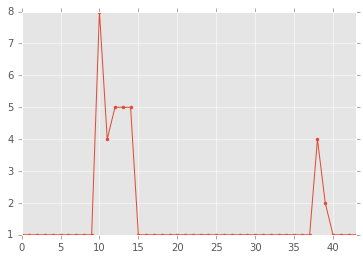

In [119]:
node = 'C5788'
ts = []
ix = []
for i in range(44):
    g = graph_dict[i]
    if g.has_node(node):
        ts.append(g.out_degree()[node])
        ix.append(i)
    
print(ts, ix)

plt.style.use('ggplot')
plt.xlim([0, 43])
plt.plot(ix, ts, '.-')

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


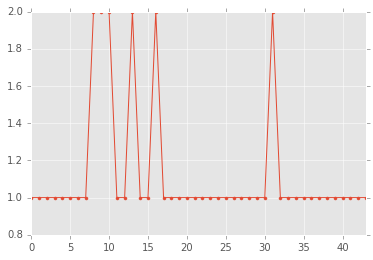

In [122]:
node = 'C3279'
ts = []
ix = []
for i in range(44):
    g = graph_dict[i]
    if g.has_node(node):
        ts.append(g.out_degree()[node])
        ix.append(i)
    
print(ts, ix)

plt.style.use('ggplot')
plt.xlim([0, 43])
plt.plot(ix, ts, '.-')

['C4645',
 'C1776',
 'C3279',
 'C4083',
 'C3756',
 'C1401',
 'C5788',
 'C617',
 'C26188',
 'C1357']